# Ford GoBike: Insights into Users' Behaviour

## Investigation Overview

The aim here was to explore GoBike's 2019 trips data, looking for users' characteristics that could influence the trip duration. Our exploration revolved especially around users' gender, generation, the trip's weekday, and start hour.

## Dataset Overview

Our original dataset consisted of about 180k trips recorded in February 2019 around the greater San Francisco Bay area, including start and end times, member's gender, birth year, user type, and other attributes. After the preliminary wrangling step, around 8k records were discarded due to missing data or filtered-out members based on their birth year.

### Importing

In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
default_viz_palette = 'YlOrBr'
default_viz_colour = sns.color_palette(default_viz_palette)[-3]

sns.set_context('notebook', font_scale=1.25)

%matplotlib inline

warnings.simplefilter("ignore")

In [3]:
data_path = "..//data//"
df_clean = pd.read_csv(os.path.join(data_path, "201902-fordgobike-tripdata_clean.csv"))

### Wrangling

In [4]:
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_var = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)

df_clean['start_weekday'] = df_clean['start_weekday'].astype(weekday_var)
df_clean['end_weekday'] = df_clean['end_weekday'].astype(weekday_var)

In [5]:
gen_labels = ['WW II', 'Post War', 'Boomers I', 'Boomers II', 'Gen X', 'Millennials', 'Gen Z']
member_gen_var = pd.api.types.CategoricalDtype(ordered=True, categories=gen_labels)
df_clean['member_generation'] = df_clean['member_generation'].astype(member_gen_var)

In [6]:
df_longer = df_clean.query("duration_min > 60").reset_index(drop=True)

## Distribution of Trip Duration

The trip duration takes on a broad range, from 1 to around 1400 minutes. About **99%** of them lasted **less than one hour**, and we can see an approximate bimodal shape when we visualise this distribution on a logarithmic scale.

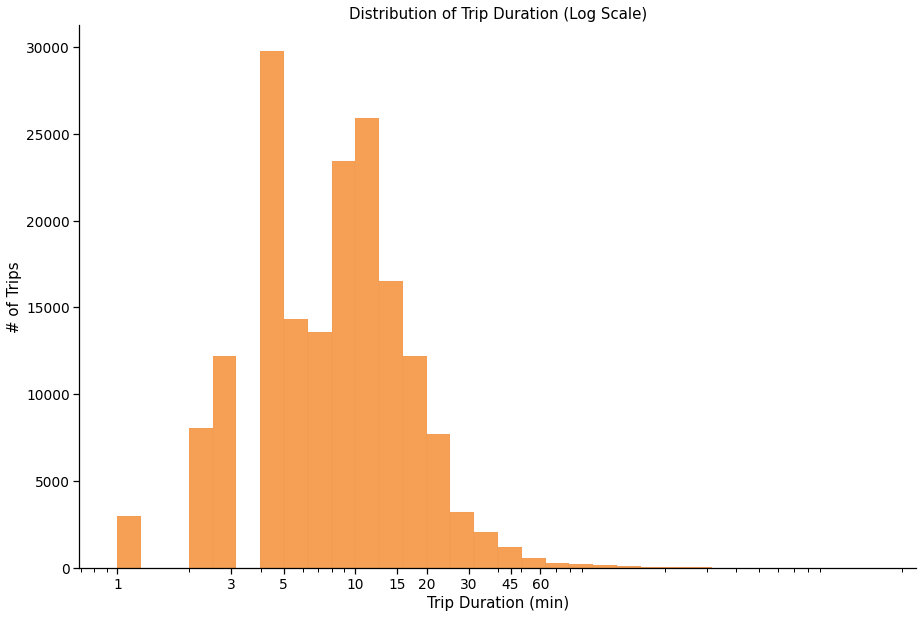

In [7]:
dur_binsize_log = 0.1
dur_bins_log = 10 ** np.arange(0, np.log10(df_clean.duration_min.max()) + dur_binsize_log, dur_binsize_log)

# defining our figure
plt.figure(figsize=(15, 10))

# plotting
p = sns.histplot(df_clean, x='duration_min', bins=dur_bins_log, color=default_viz_colour)

# scaling
p.set_xscale('log')

# x-ticks
p_xticks = [1, 3, 5, 10, 15, 20, 30, 45, 60]
p.set_xticks(p_xticks)
p.set_xticklabels(p_xticks)

# labels and title
p.set_title('Distribution of Trip Duration (Log Scale)')
p.set_xlabel('Trip Duration (min)')
p.set_ylabel('# of Trips')

# finishing touches
sns.despine()
plt.show()

## Trips per Weekday and Start Hours
Most of the trips happened **from Monday to Friday**, especially during **rush hours** - suggesting Ford GoBike is broadly used for commuting purposes.

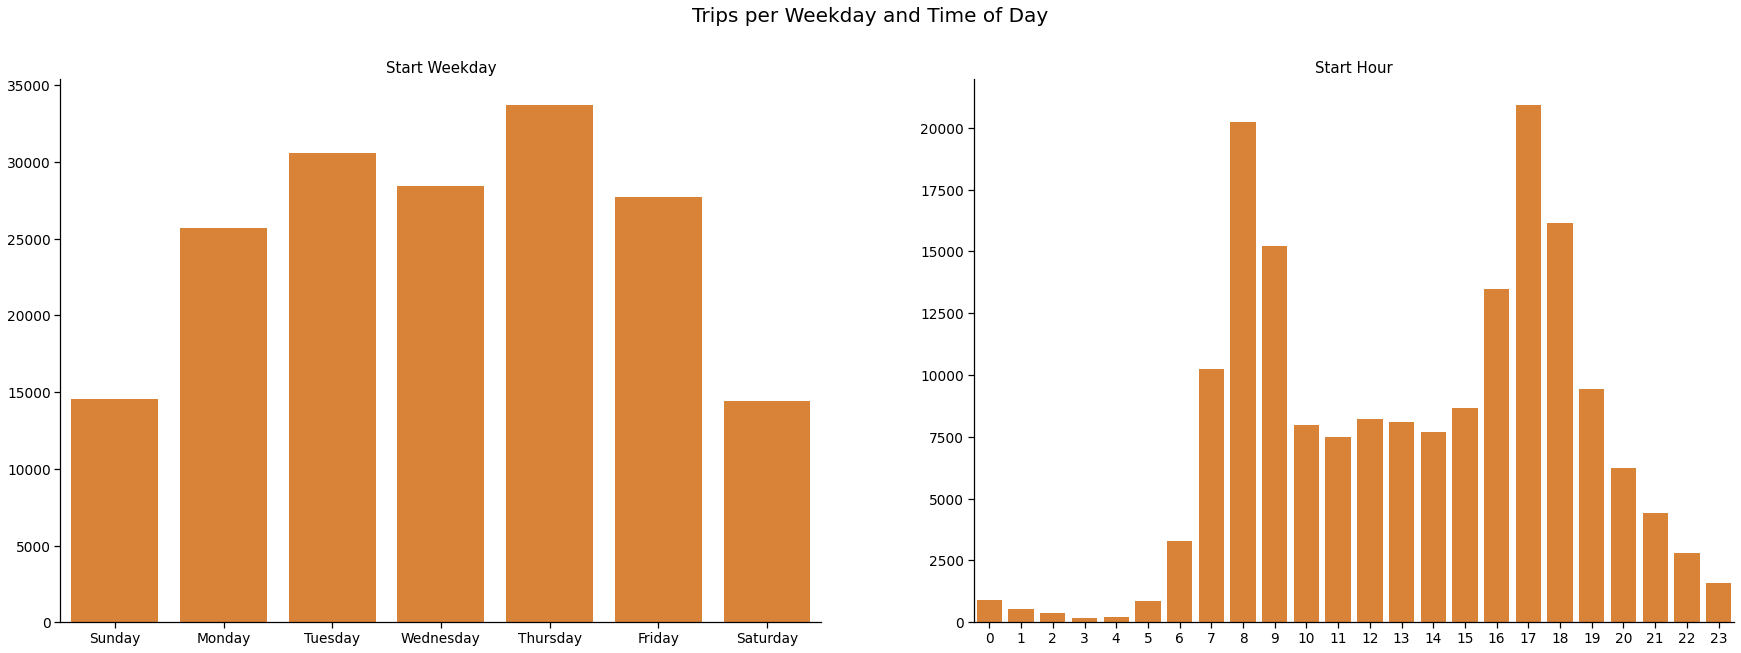

In [8]:
# defining our figure
fig, ax = plt.subplots(ncols=2, figsize=(30, 10))

# plotting
sns.countplot(data=df_clean, x='start_weekday', ax=ax[0], color=default_viz_colour)
sns.countplot(data=df_clean, x='start_hour', ax=ax[1], color=default_viz_colour)

# titles
ax[0].set_title('Start Weekday')
ax[1].set_title('Start Hour')

# labels
fig.suptitle("Trips per Weekday and Time of Day", fontsize=20)
plt.setp(ax, xlabel=None, ylabel=None)

# finishing touches
sns.despine()
plt.show()

## Trips per Generation
The vast majority of the trips were made by **Millennials**, followed by Gen X-ers and Gen Z-ers.

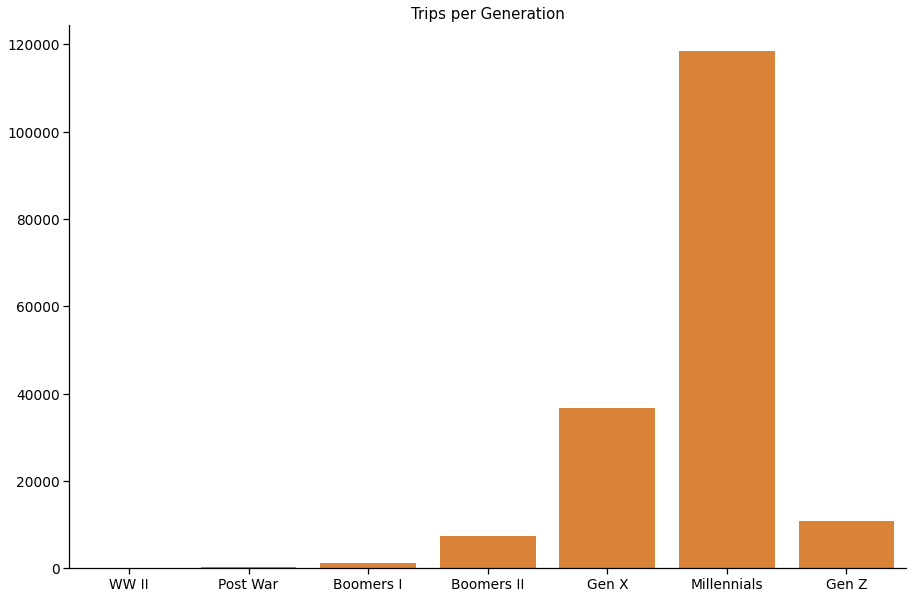

In [9]:
# defining our figure
plt.figure(figsize=(15, 10))

# plotting
fig = sns.countplot(data=df_clean, x='member_generation', color=default_viz_colour)

# titles
fig.set_title("Trips per Generation")

# labels
fig.set_xlabel(None)
fig.set_ylabel(None)

# finishing touches
sns.despine()
plt.show()

## Trips per Gender
**74%** of the trips were made by clients who identify as a **male**, **23%** were by females, and only **2%** of the trips were of non-binary users.

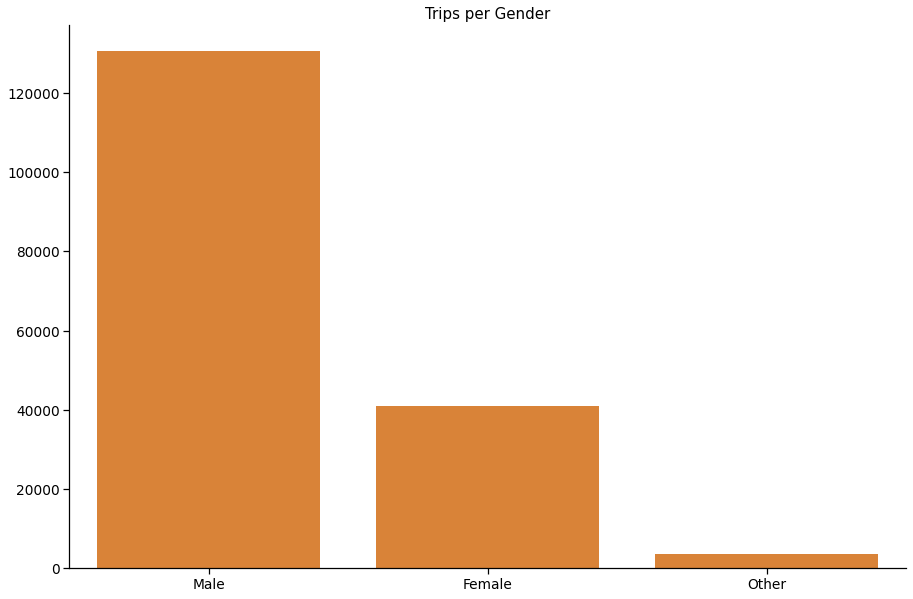

In [10]:
# defining our figure
plt.figure(figsize=(15, 10))

# plotting
fig = sns.countplot(data=df_clean, x='member_gender', color=default_viz_colour, order=df_clean.member_gender.value_counts().index)

# titles
fig.set_title("Trips per Gender")

# labels
fig.set_xlabel(None)
fig.set_ylabel(None)

# finishing touches
sns.despine()
plt.show()

## User Types and Weekdays

When we look at all trips, we observe an **enormous amount of subscriber bike trips** compared to customers', especially on workdays. However, if we consider **only longer trips** (i.e. that lasted more than one hour), the difference is drastically smaller, and we can also see **customers are responsible for most of the weekend longer trips**.

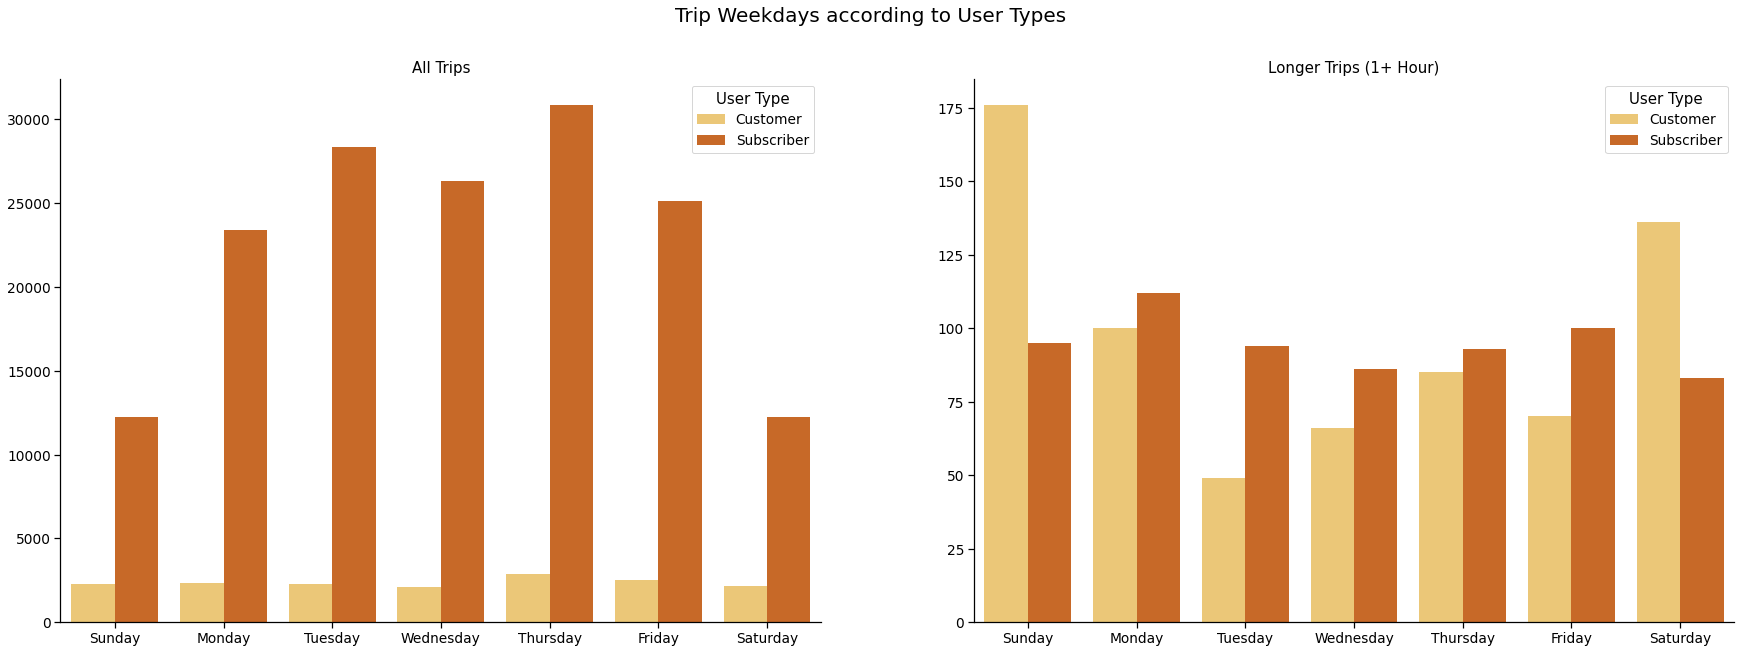

In [11]:
# defining our figure
fig, ax = plt.subplots(ncols=2, figsize=(30, 10))

# plotting
sns.countplot(data=df_clean, x='start_weekday', ax=ax[0], hue='user_type', palette=default_viz_palette)
sns.countplot(data=df_longer, x='start_weekday', ax=ax[1], hue='user_type', palette=default_viz_palette)

# titles
fig.suptitle("Trip Weekdays according to User Types", fontsize=20)
ax[0].set_title('All Trips')
ax[1].set_title('Longer Trips (1+ Hour)')

# labels
plt.setp(ax, xlabel=None, ylabel=None)
ax[0].legend(title="User Type")
ax[1].legend(title="User Type")

# finishing touches
sns.despine()
plt.show()

## Trip Duration per User Type

On average, **customers' bike trips last a bit longer** than subscribers'.

Coupling this with the findings made in the previous section, we can observe that **subscribers** use the service more for **short and frequent trips**, while **customers** go on fewer but longer trips.

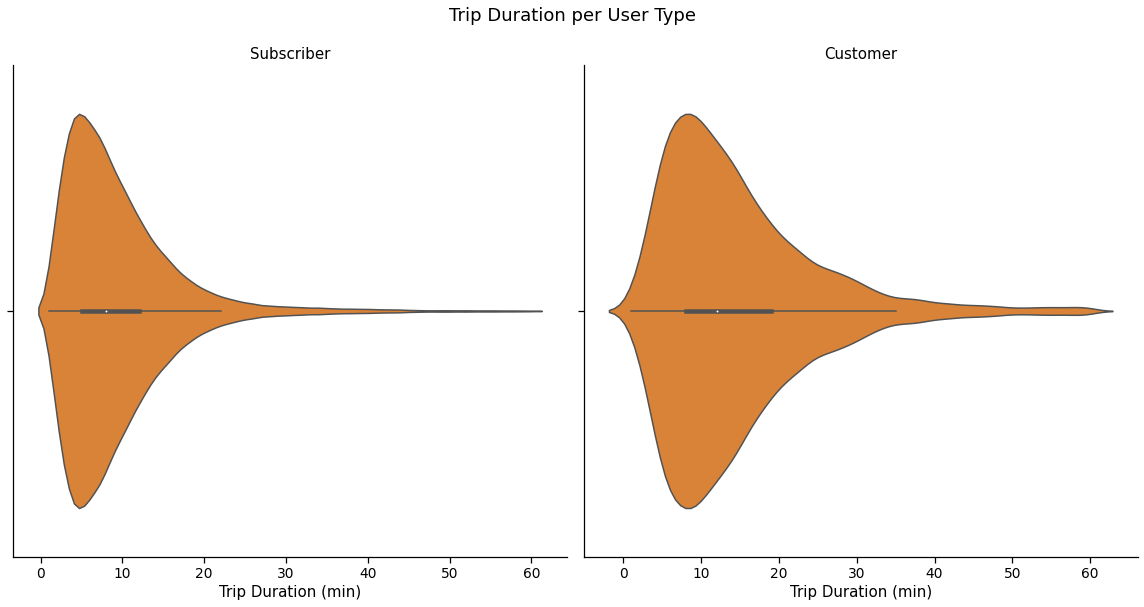

In [12]:
# filtering data
df_clean_filtered = df_clean.query("duration_min <= 60").reset_index(drop=True)

# plotting w faceting
grid = sns.FacetGrid(data=df_clean_filtered, col='user_type', sharex=False, sharey=False, col_wrap=2, height=8)
grid.map(sns.violinplot, 'duration_min', color=default_viz_colour)

# titles + labels
grid.fig.suptitle("Trip Duration per User Type", fontsize=18, x=0.5, y=1.05)
grid.set_titles(col_template="{col_name}")
grid.set_axis_labels("Trip Duration (min)")

plt.show()

## User Types and Generations
When we look at the big picture, the member's generation seems to have little to no effect on the user type, but the story changes when we focus on longer trips. We can observe **most of Millennials and Gen Z-ers preferred riding as customers rather than as subscribers**.

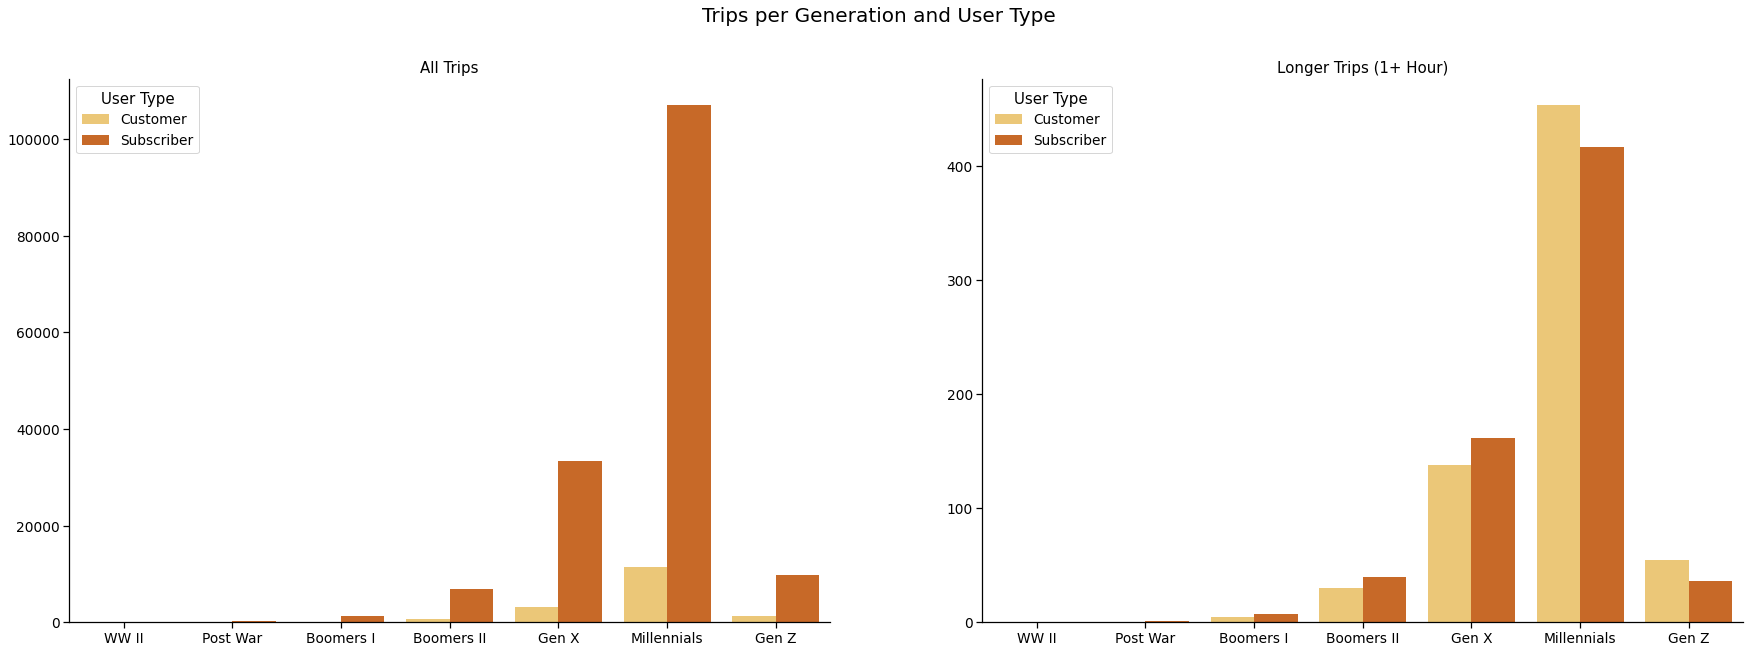

In [13]:
# defining our figure
fig, ax = plt.subplots(ncols=2, figsize=(30, 10))

# plotting
sns.countplot(data=df_clean, x='member_generation', ax=ax[0], hue='user_type', palette=default_viz_palette)
sns.countplot(data=df_longer, x='member_generation', ax=ax[1], hue='user_type', palette=default_viz_palette)

# titles
fig.suptitle("Trips per Generation and User Type", fontsize=20)
ax[0].set_title('All Trips')
ax[1].set_title('Longer Trips (1+ Hour)')

# labels
plt.setp(ax, xlabel=None, ylabel=None)
ax[0].legend(title="User Type", loc="upper left")
ax[1].legend(title="User Type", loc="upper left")

# finishing touches
sns.despine()
plt.show()

## Start Hours according to Age and Gender

The plot below shows us **the older the member, the sooner they prefer to leave for their bike rides**. Also, there's just a small difference between male and female averages.

The non-binary people's start hours, in turn, have higher variation and larger confidence intervals, possibly due to the small number of trips.

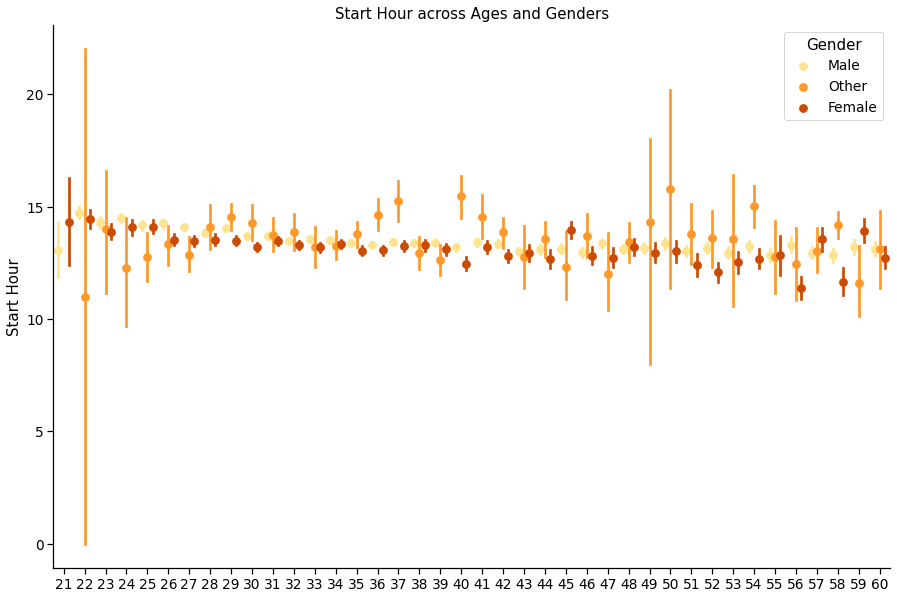

In [14]:
# defining our figure
plt.figure(figsize=(15, 10))

# plotting
subset = df_clean.query("member_age <= 60") # original range is too large, affecting our viz's legibility
ax = sns.pointplot(data=subset, x='member_age', y='start_hour', hue='member_gender', dodge=0.5, linestyles='', palette=default_viz_palette)

# title + label + legend
plt.title("Start Hour across Ages and Genders")
plt.xlabel(None)
plt.ylabel("Start Hour")
plt.legend(title="Gender")

# finishing touches
sns.despine()
plt.show()